#### ML第1回勉強会（阿久津朋美）                                                                                                            updated 2018/3/27

# Section 2 教師あり学習

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import mglearn
import numpy as np
#from IPython.display import display
#from preamble import *

## 2.1 クラス分類と回帰

教師あり学習は分類と回帰の2種類に分けることができる。  
回帰は連続値の予測に用いることができる。求める出力に連続性かがあるかによって、クラス分類か回帰を用いるかを区別する。
![](supervised_class.png)

## 2.2 汎化、過剰適合、適合不足

教師あり学習では、訓練データを用いてモデルを構築し、新しいデータに対して予測（予想）する。
モデルが新しいデータに対して正確に予測できるなら、訓練データを用いてテストデータに対して汎化(generalize)しているという。
* 過剰適合(overfitting) - 訓練セットの特徴にモデルを適合しすぎて、複雑なモデルを作ってしまうこと
* 適合不足(underfitting) - 訓練セットに対して上手く機能しない単純すぎるモデル

![model_complexity](Overfitting_Underfitting.png)

## 2.3 教師あり機械学習アルゴリズム

### 2.3.1 用いるデータセット

<IPython.core.display.Javascript object>


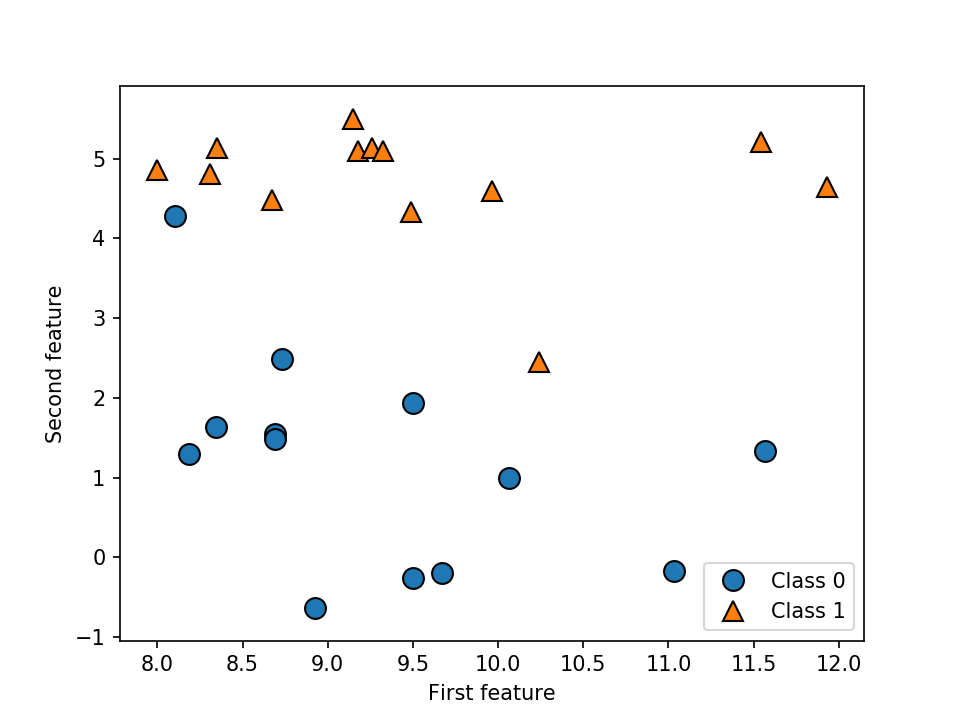

X.shape: (26, 2)


In [2]:
## forge dataset ##
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

<IPython.core.display.Javascript object>


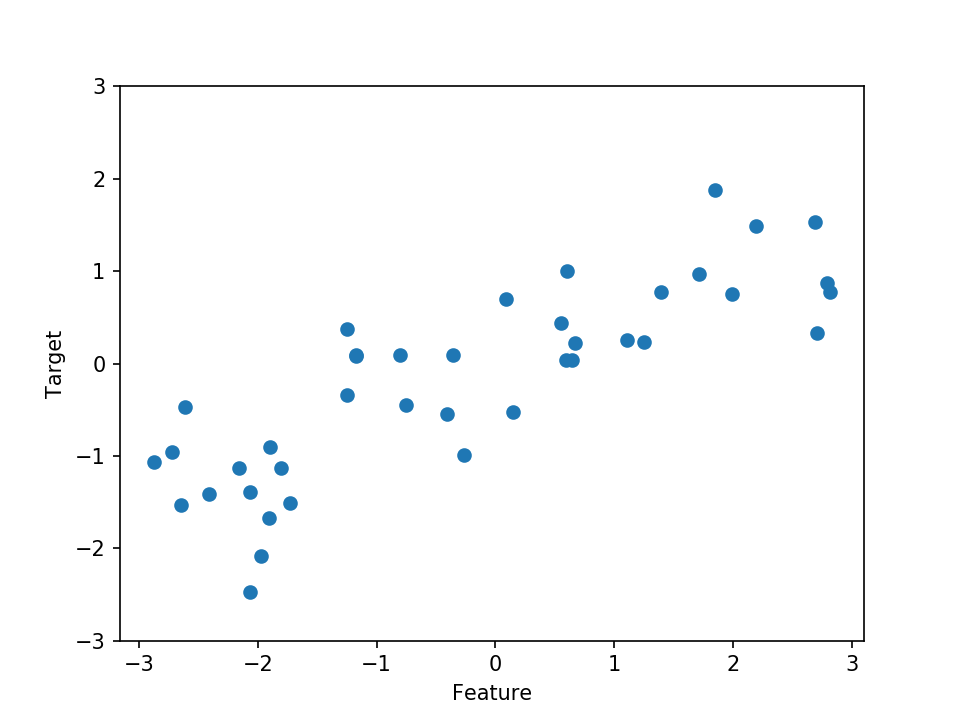

Text(0,0.5,'Target')

In [3]:
## wave dataset ## 
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

##### 他のデータ

cancerデータ

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


scikit-learnに含まれるデータはBunchというクラスのオブジェクトに格納されている。値を取り出す際は、.keysのようにドットを用いてアクセスできる。

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [7]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


malignant:悪性、benign:良性

* 格納されている各特徴量

In [8]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Bostonのhousingデータ

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### 2.3.2 k近傍法（k nearest neighbors) (http://scikit-learn.org/stable/modules/neighbors.html)
k近傍法の概念  
正解ラベル付きの観測データ集合${\it D=\{(x,y)\}}$が与えられるとする。$y$はデータが属するクラス$C$で、$y_i\in\{1,2,...,Q\}$と$Q$個に分類できるとする。新しいデータ$x$が属する$C(x)$は以下のように求める。  
* step1 $x$との距離が近い順に$D$中のデータを並べ、その結果を$\{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\}$とする。
* step2 点$x$に最も近い$k$個のサンプル$\{(x_1, y_1), (x_2, y_2), ..., (x_k, y_k)\}$の中の$\{y_i\}$のうち最も出現回数の多いクラス$y$を$C(x)$の値とする。$k_q$を$k$個のサ ンプルのうち，カテゴリ$q$であるものの数として、 ($\sum_{q=1}^Qk_q=k$)
$$ \hat{C}(x)=\arg\max_{q=1,...,Q}k_q $$
を求めることになる。

<IPython.core.display.Javascript object>


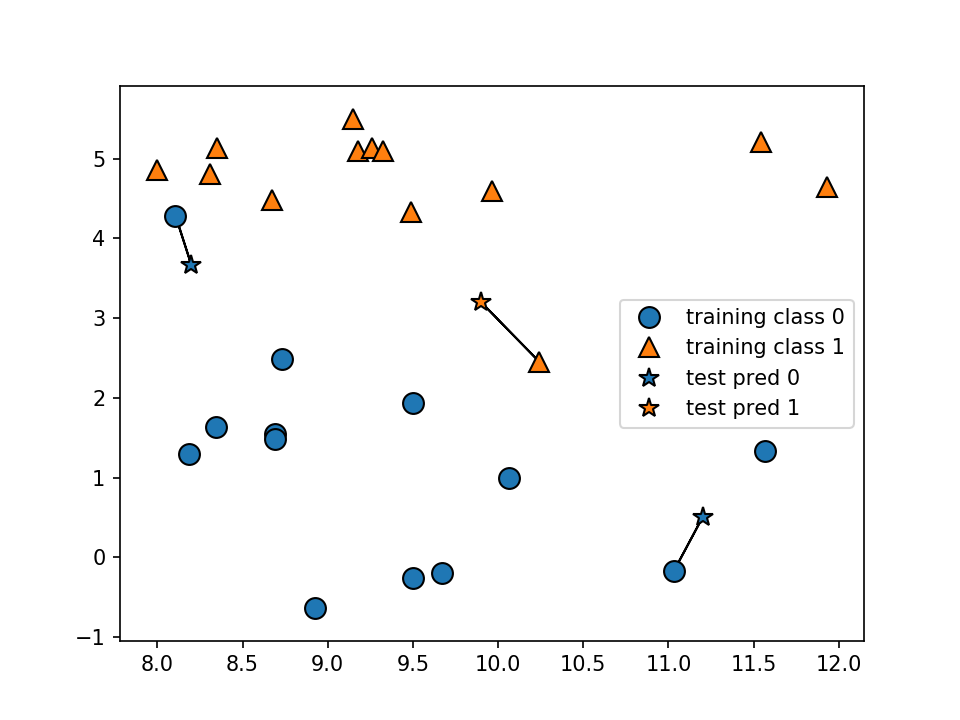

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

mglearn.plots.plot_knn_classification()の中に定義されている。。

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

from mglearn.datasets import make_forge
from mglearn.plot_helpers import discrete_scatter

def plot_knn_classification(n_neighbors=1):

    X, y = make_forge()

    X_test = np.array([[8.2, 3.66214339], [9.9, 3.2], [11.2, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                      X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = discrete_scatter(X_test[:, 0], X_test[:, 1], clf.predict(X_test), markers="*")
    training_points = discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(training_points + test_points, ["training class 0", "training class 1",
                                               "test pred 0", "test pred 1"])

<IPython.core.display.Javascript object>


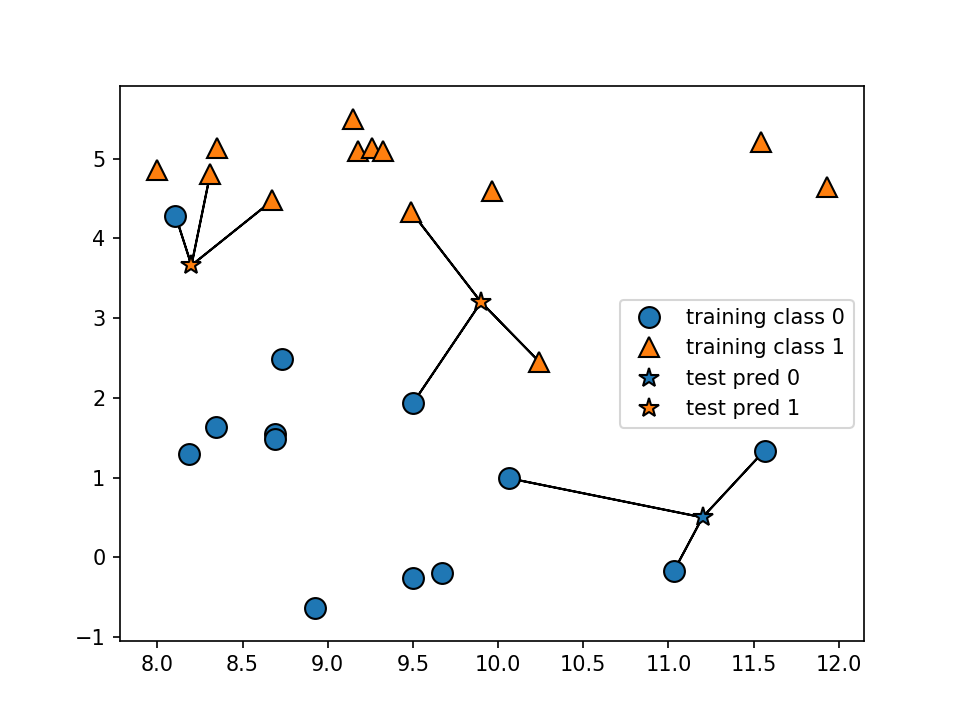

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

scikit-learnを用いた汎化性能評価  
データの75%を訓練セットにし、残り25%をテストセットにする。

In [14]:
from sklearn.model_selection import train_test_split
import mglearn
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

予測

In [17]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [18]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


##### KNeighborsClassifierの解析　　
$xy$平面のすべての点について、予測結果を表示  

<IPython.core.display.Javascript object>


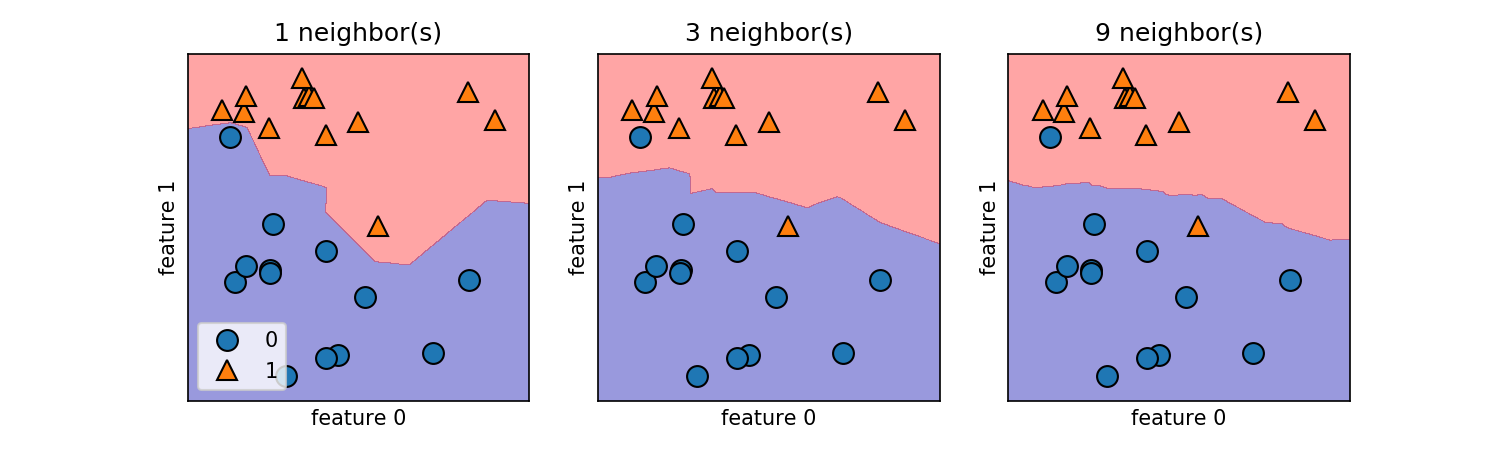

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) ### eps=0.5で区切っているようである
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

$k=1$の場合は境界が訓練データに近くなり、最も複雑なモデルになる。

##### モデルの複雑さと汎化性能の関係

<IPython.core.display.Javascript object>


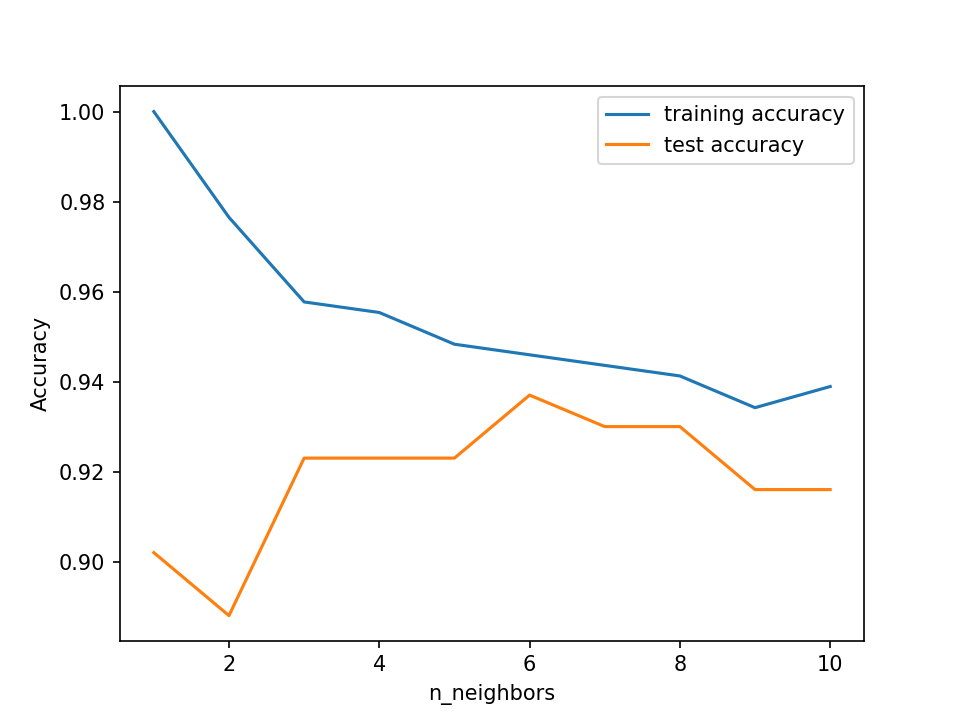

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### 2.3.2.3 k-近傍回帰

KNeighborsRegressor (from scikit-learn)

<IPython.core.display.Javascript object>


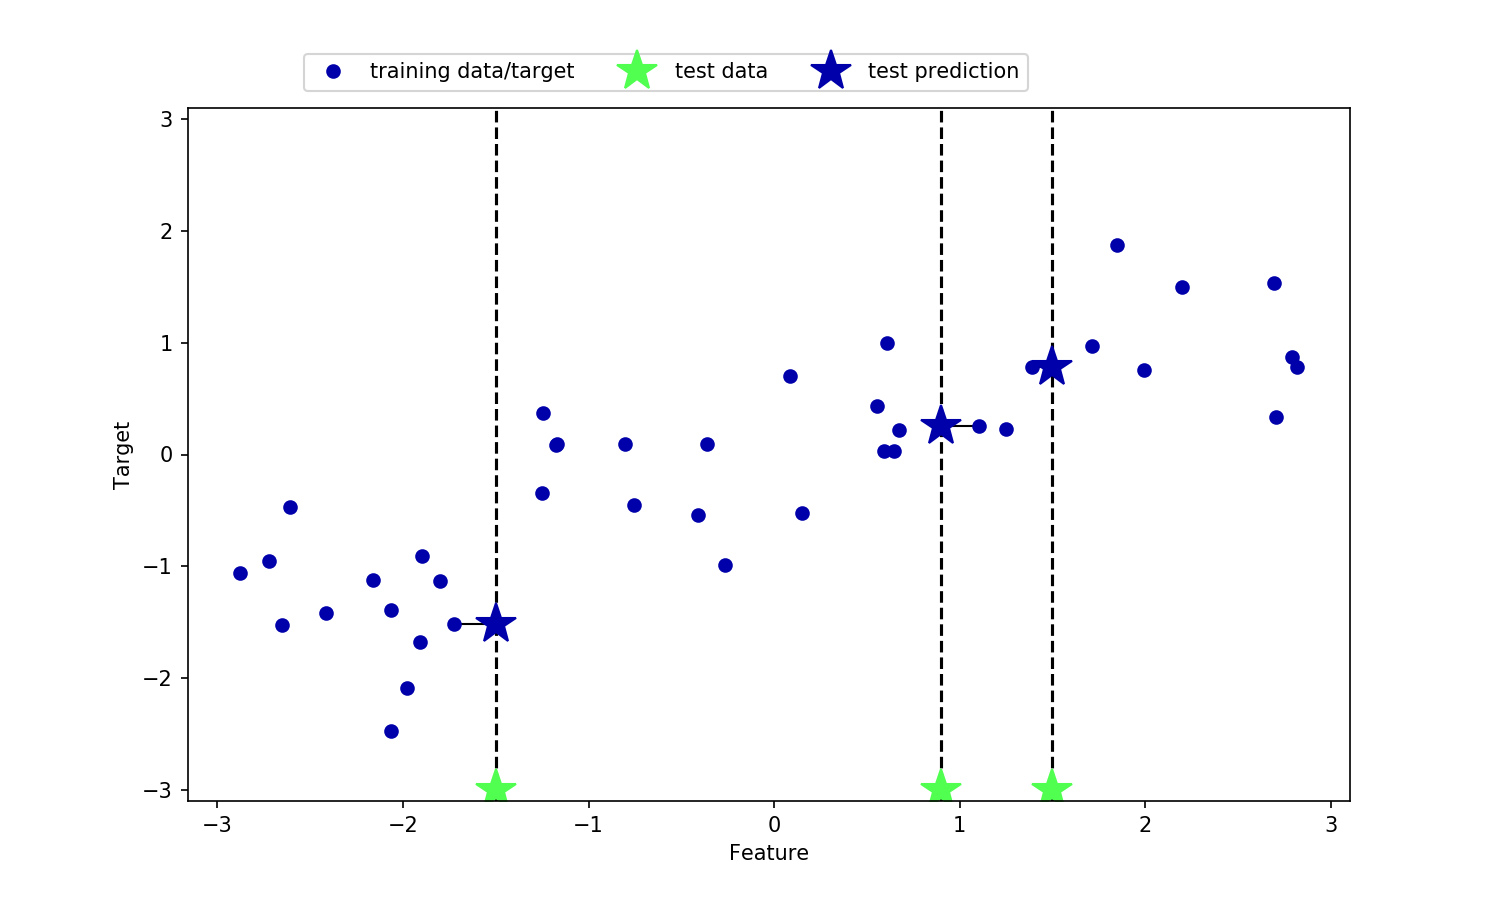

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

<IPython.core.display.Javascript object>


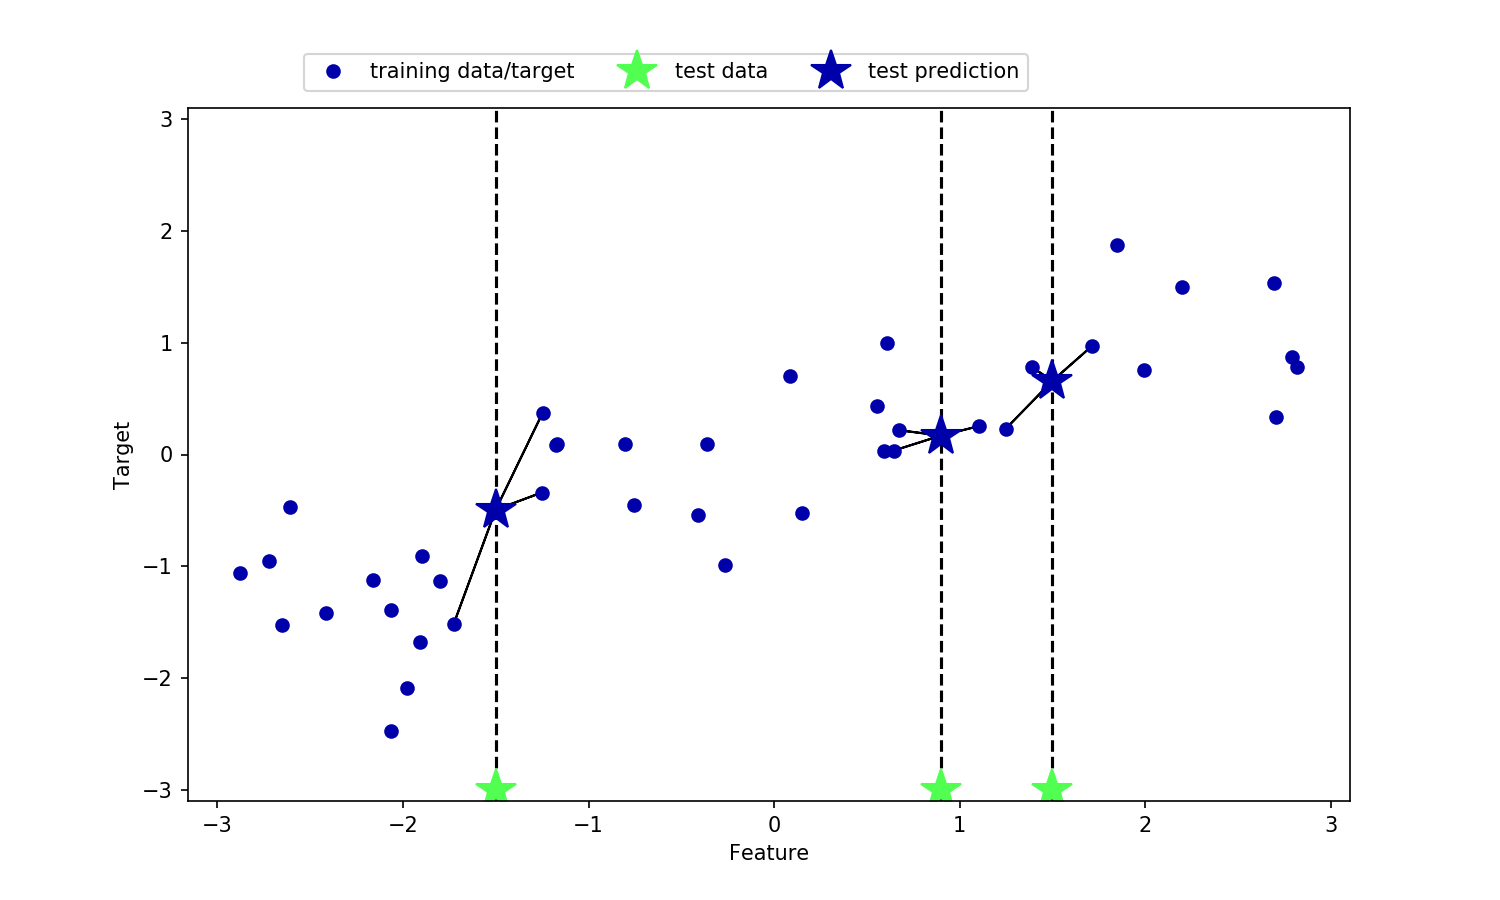

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

code

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [24]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


##### KNeighborRegressorの解析

<IPython.core.display.Javascript object>


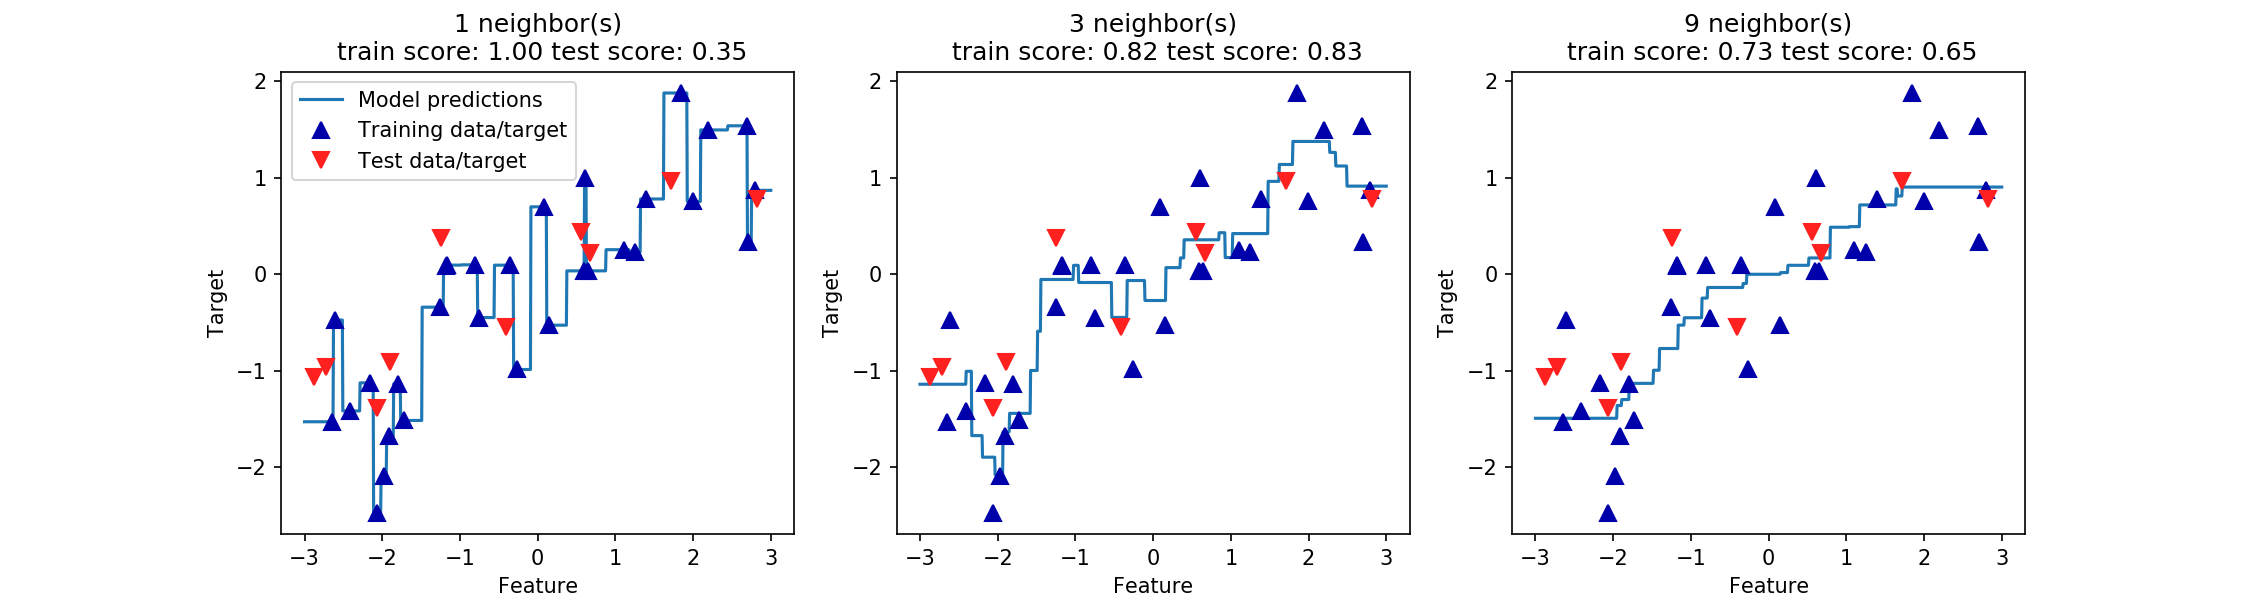

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

近傍点を増やすと、予測はスムーズになるが、訓練データに対する適合度は下がる。

#### 2.3.2.5 利点と欠点とパラメータ

KNeighbors分類器のパラメータは、近傍点の数、データ点間の距離速度（デフォルトはユークリッド距離）の2つである。
* 理解しやすい
* データセット（特徴量の数、サンプル数）が大きくなると、処理速度が遅くなる。
* ほとんどの特徴量が多くの場合０となるような疎なデータセットでは、性能が悪い

### 2.3.3 線形モデル

* 線形回帰
${\bf x}=[1, x_1,..., x_K]^T, x_k\in R$, 重みベクトル${\bf \theta}=[\theta_0, \theta_1,..., \theta_K]^T$と用いて
$$ y=\sum_{k=0}^Kx_k\theta_k=<{\bf x}{\bf \theta}>$$
で表現される母集団の構造を推定することを線形回帰と呼ぶ
* 最小二乗法  
以下のモデルを仮定
$$ y_i=f(x_i) $$
目的関数：
$$ J(\theta)=\frac{1}{2}\sum_{i=1}^n(y_i-f(x_i))^2 $$ 
を最小にするパラメータ$\theta=(\theta_1, \theta_2, ..., \theta_p)^T$を求める方法を最小二乗法と呼ぶ。

例

w[0]: 0.393906  b: -0.031804


<IPython.core.display.Javascript object>


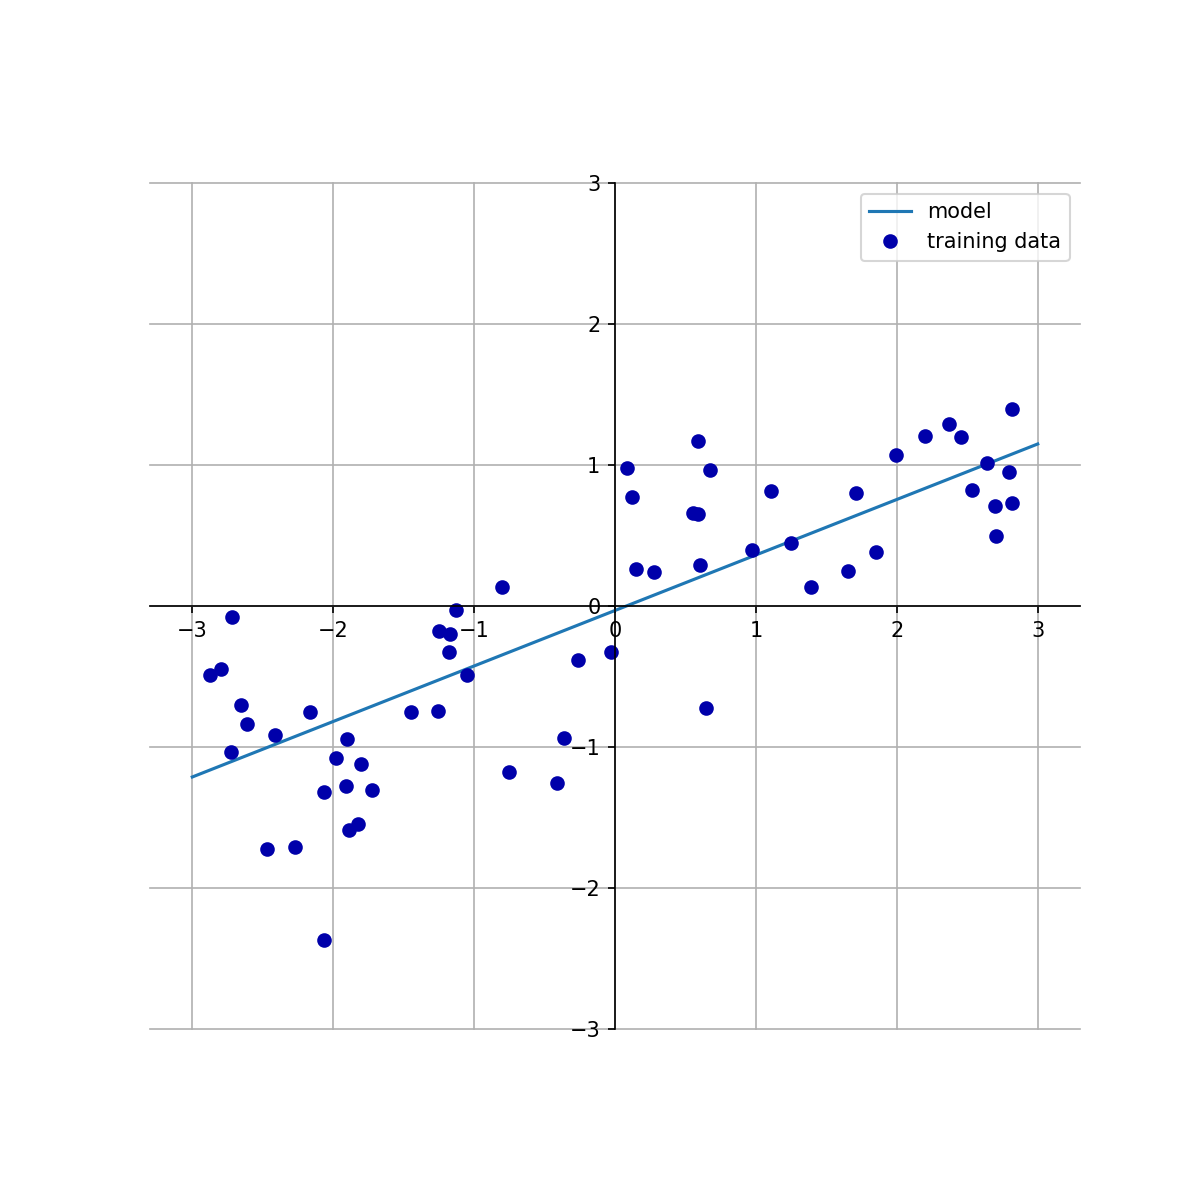

In [27]:
mglearn.plots.plot_linear_regression_wave()

#### 2.3.3.2 線形回帰（最小二乗法）

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
#interceptは intercept_tに格納

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [30]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


より複雑なデータ（104の特徴量を持つ)に対しては過剰適合の可能性が高くなる。

In [31]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [39]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


訓練データのスコアは高いが、テストデータに対するスコアは低い。この複雑なデータに対して、過剰適合が起こっていると考えられる。

#### 正則化
過剰適合を防ぐため、制約項を入れる

#### 2.3.3.3 リッジ回帰  
パラメータ空間を球内に制限し
$$ \min_{\theta}J(\theta) \    \text{subject to} \    \|\theta\|^2\leq R  $$
最適化問題を解く。
この問題はラクランジュ問題に帰着でき、
$$ \max_{\lambda}\min_{\theta} J(\theta)+ \frac{\lambda}{2} \|\theta - R\|^2$$ 
$L^2$制約付き最小二乗法では、$\lambda$を事前に決めることによって、
$$\hat{\theta}=\arg \min_{\theta}\{J(\theta)+\frac{\lambda}{2}\|\theta\|^2 \}$$
とし、$\theta$を求める。



In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


同じboston housingデータを用いてリッジ回帰を行うと、汎化性能が高くなることがわかる。alphaによってモデルの簡潔さを調整できる。alphaが大きいと訓練データに対する性能は低下するが、汎化性能は高くなる。デフォルトではalpha=1である。

In [33]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


<IPython.core.display.Javascript object>


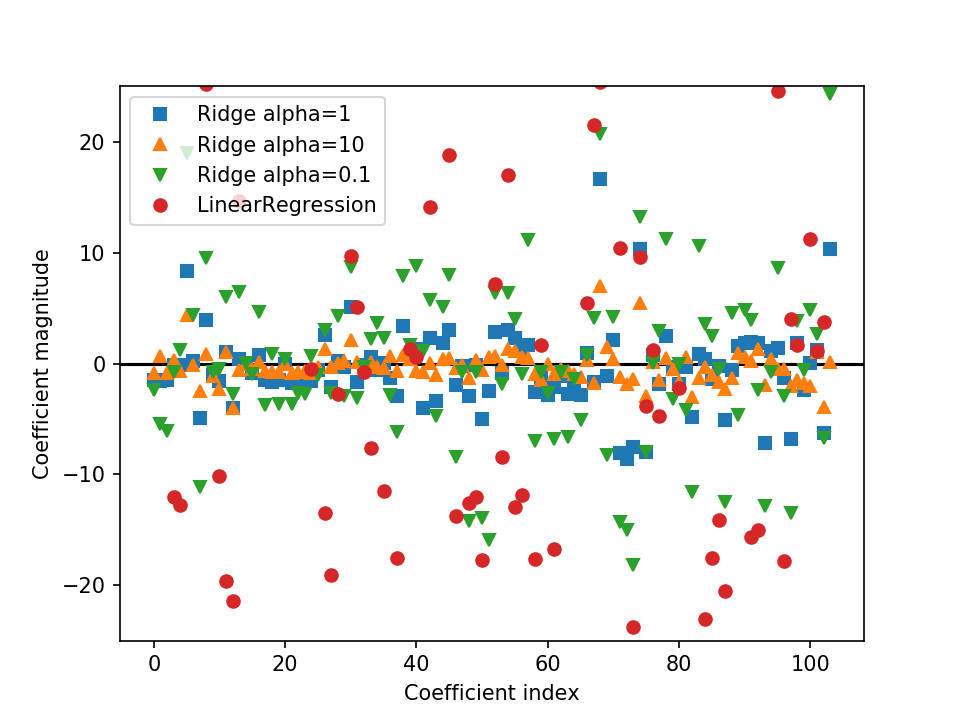

In [35]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

alphaを固定した場合に、訓練データの大きさを変えて、性能を線形回帰とリッジ回帰で比較する。
以下の図にみられるように
* 訓練データが少ないと線形回帰はテスト性能が悪くなる。十分なデータがある場合には、正則化を考えなくてよい。  
* データ量が多くなると、線形回帰は訓練性能が低下する。過剰適合し、モデルがデータを覚えられなくなる？

<IPython.core.display.Javascript object>


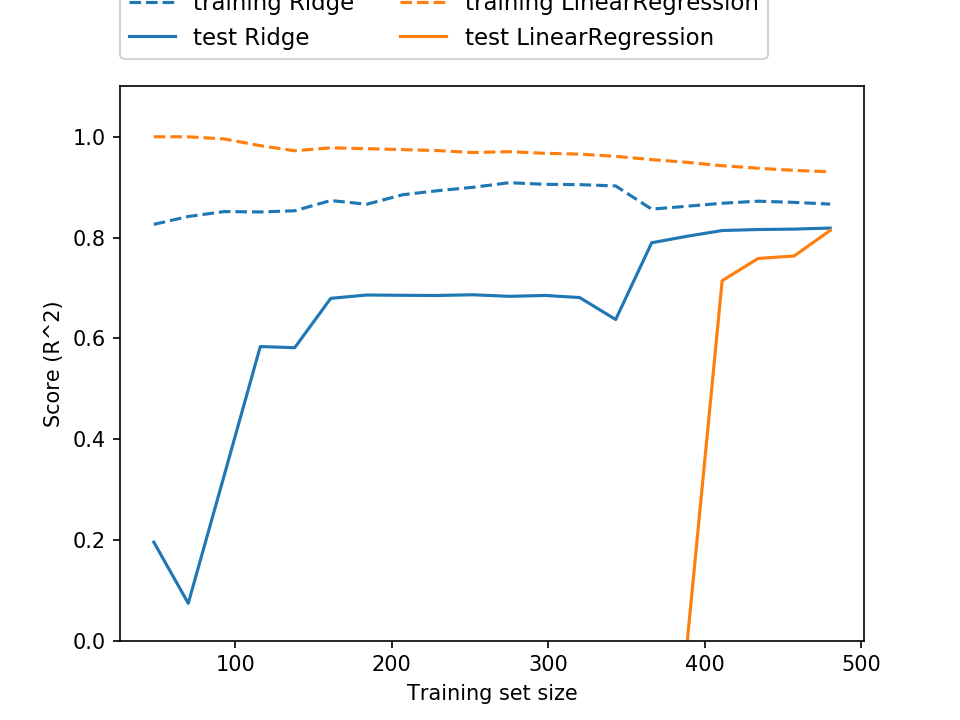

In [36]:
mglearn.plots.plot_ridge_n_samples()

#### ラッソ回帰

ラッソ回帰の場合は、以下の
$$ \min_{\theta}J(\theta) \    \text{subject to} \    \|\theta\|\leq R  $$
最適化問題を解く。ここで$\|\theta\|=\sum_{j=1}^P|\theta|$である。L1正則化と呼ばれる。Lassoにおいては、いくつかの係数が完全にゼロになり、モデルにおいて無視される特徴量が出てくるということになる。



In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


上の例では104個の特徴量のうち4つしか使用していない。適合不足なので、alphaを低くする。この際、mat_iter(最大の繰り返し回数)をデフォルト値から増やす必要がある。

In [38]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [39]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


<IPython.core.display.Javascript object>


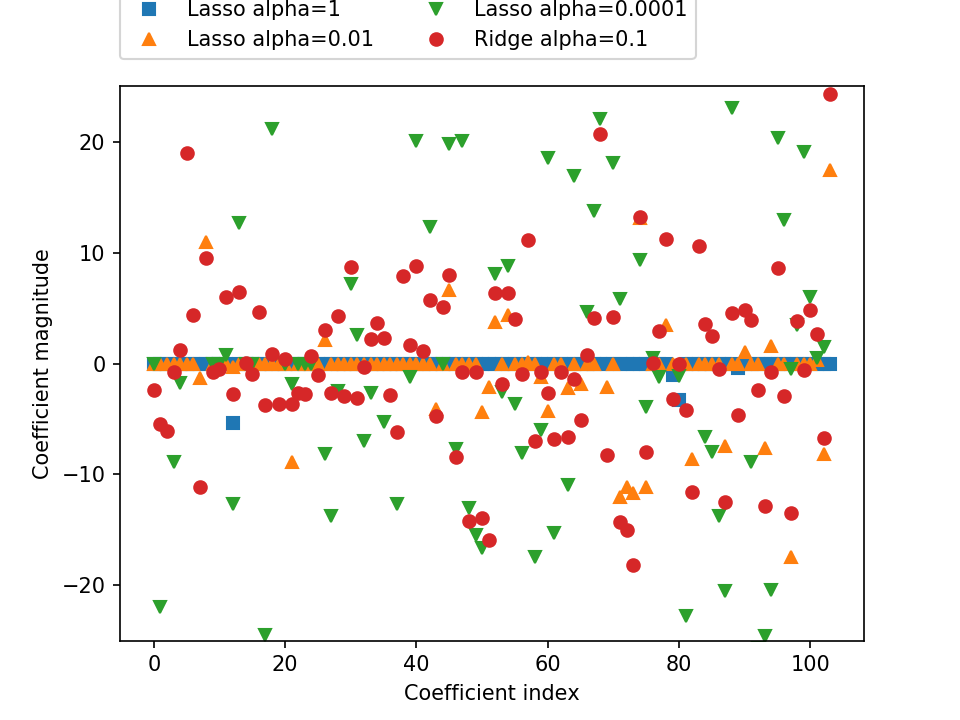

Text(0,0.5,'Coefficient magnitude')

In [40]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

##### Noted
LassoもLidge回帰もElasticNetという線形回帰を用いている。ElasticNet回帰はDescent Cordinate法(参照　https://www.jstatsoft.org/article/view/v033i01/v33i01.pdf) (https://www.slideshare.net/amp-kyoto/coordinate-descent) を用いている。
この方法は、Gauss-Sidel法に似ている。(参照 https://ameblo.jp/p630/entry-11862695676.html)

The number of iteration ：　LassoとLidgeの共通パラメータ。
今回の例のように特徴量の数が多い場合、alphaを小さくすると用いる特徴量が多くなる。その結果、Lassoでは、MAE(平均絶対誤差）が大きくなるなる。そのため、iterationの数を増やす必要が出てくる。

#### 2.3.3.5 クラス分類のための線形モデル

線形モデルによる回帰では、出力$\hat{y}$は特徴量の線形関数となる。次元を増やすと、平面、高次元では超平面となる。つまり、線形の2クラス分類では、2つのクラスを直線や平面、超平面で分割することになる。  
線形モデルを学習するアルゴリズムは以下の2つに区別される。
* 係数と切片の特定の組み合わせと訓練データの適合度を図る尺度
* 正規化を行うか。行うならどの方法か？

＊機械学習の目的では、訓練データへの適合度を測る尺度は、あまり意味をなさない。

#### ロジスティック回帰、線形サポートベクタマシン

<IPython.core.display.Javascript object>


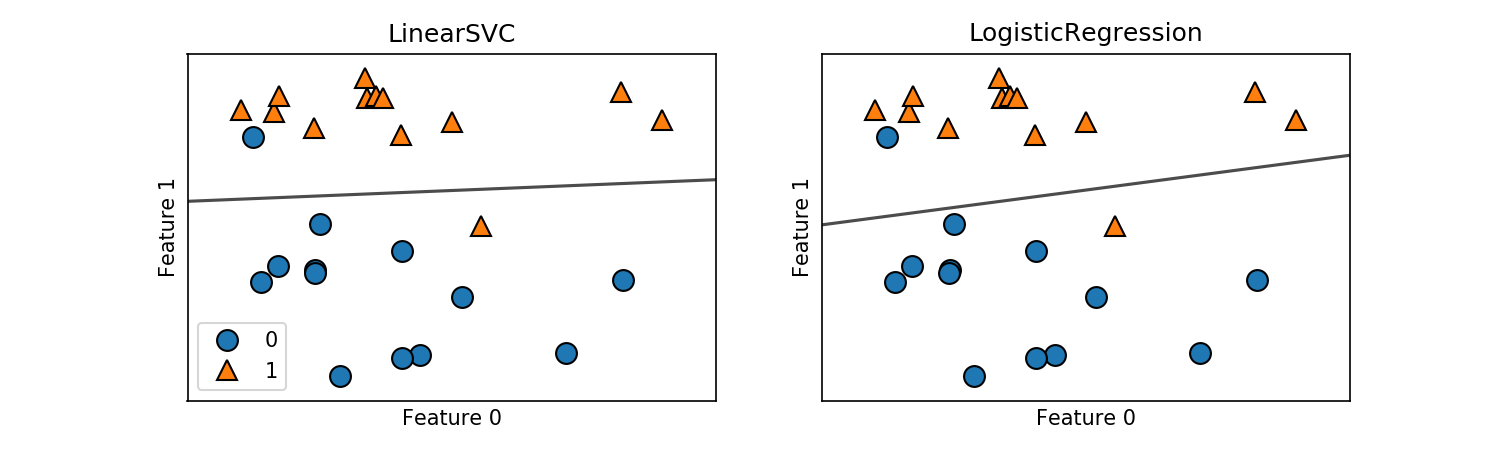

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

デフォルトでは、これらのモデルはL2正則化を行う。LogisticRegressionとLinearSVCにおける正則化の強度を決定するトレードオフパラメータと呼ばれ、Cが大きくなると正則化は弱くなる。パラメータを大きくすると、適合度を上げようとする。

<IPython.core.display.Javascript object>


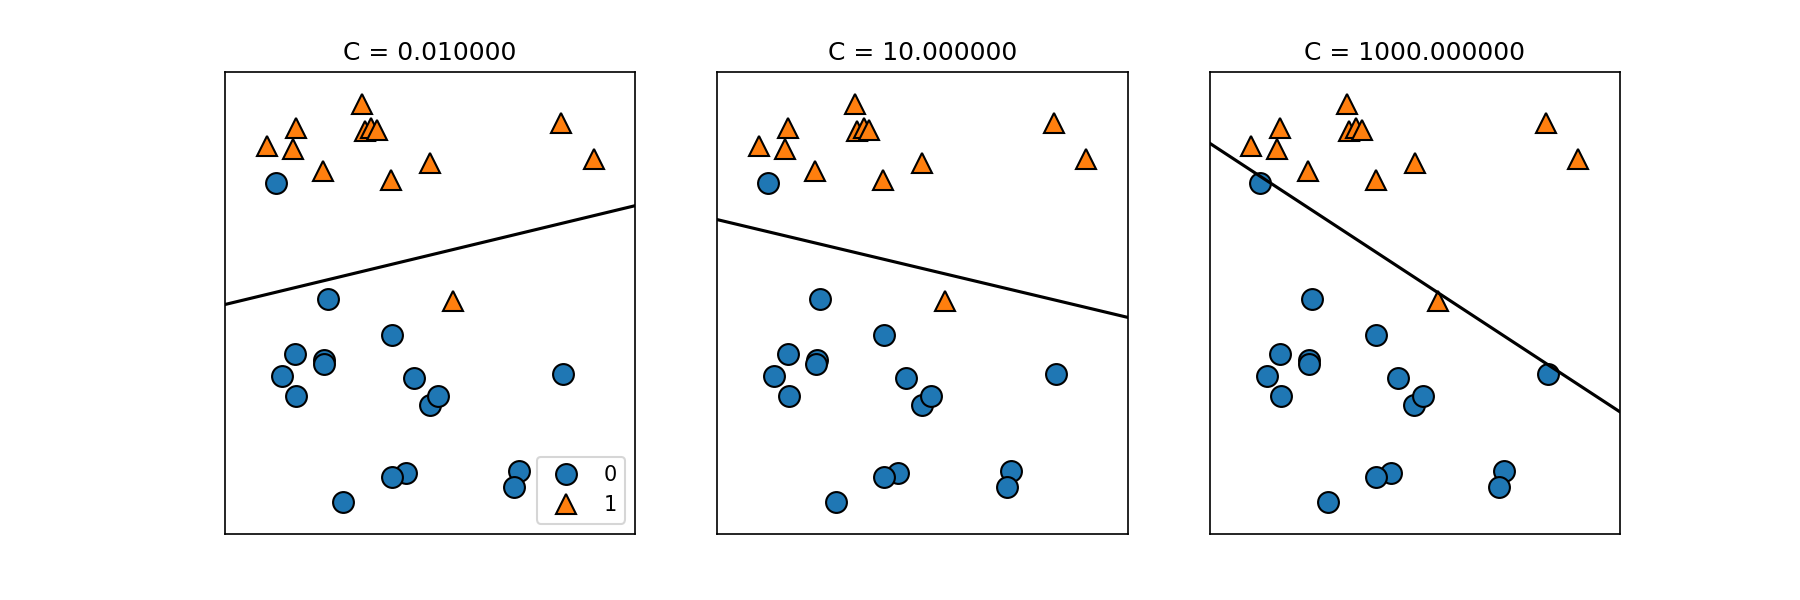

In [42]:
mglearn.plots.plot_linear_svc_regularization()

Cが小さいと協力な正則化になる。C=1000の場合は過剰適合している可能性がある。

高次元の場合は線形モデルによるクラス分類は非常に強力なり、特徴量の数が多い場合には過剰適合を回避する方法が重要になってくる。以下はcancerデータを用いた例である。

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


In [44]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [45]:
logreg100.decision_function(X_train)
logreg100.coef_.T

array([[ 4.80376324],
       [ 0.1728842 ],
       [-0.42652667],
       [-0.01386936],
       [-1.83791383],
       [-0.50322538],
       [-1.83179589],
       [-2.85051078],
       [-2.63265002],
       [ 0.07780747],
       [ 0.04577679],
       [ 2.96533874],
       [-0.57192061],
       [-0.09479399],
       [-0.23372298],
       [ 2.21798758],
       [ 3.07453331],
       [-0.16345079],
       [ 0.1890421 ],
       [ 0.37127681],
       [-0.11132936],
       [-0.5164732 ],
       [ 0.11523547],
       [-0.02078844],
       [-3.36840247],
       [-1.83352289],
       [-2.60408203],
       [-5.86551523],
       [-5.31948368],
       [-0.08207132]])

In [46]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


<IPython.core.display.Javascript object>


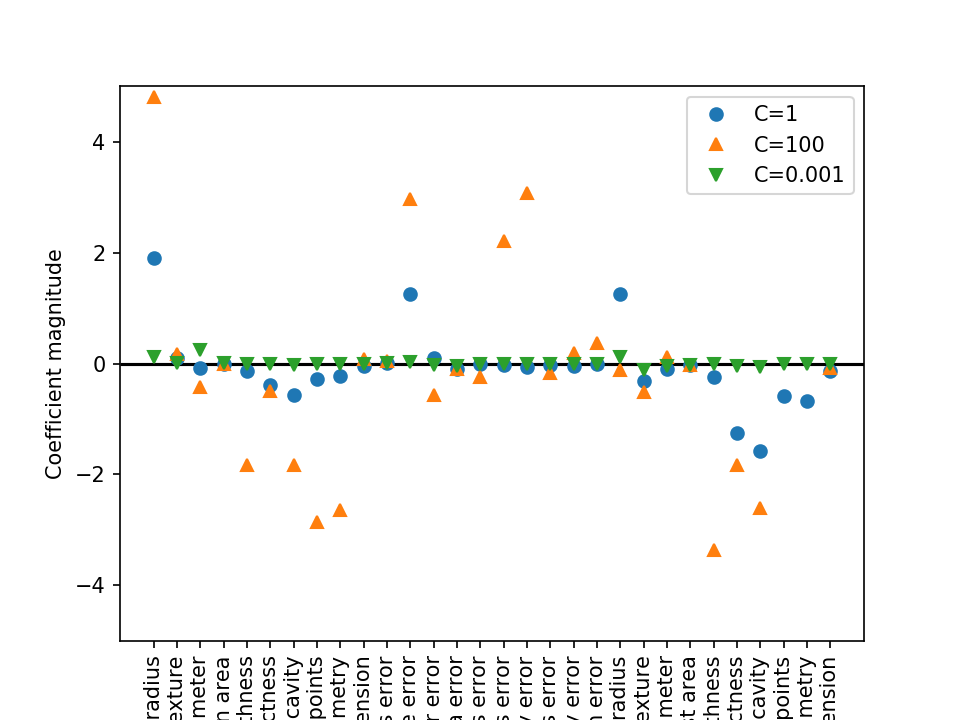

In [47]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


<IPython.core.display.Javascript object>


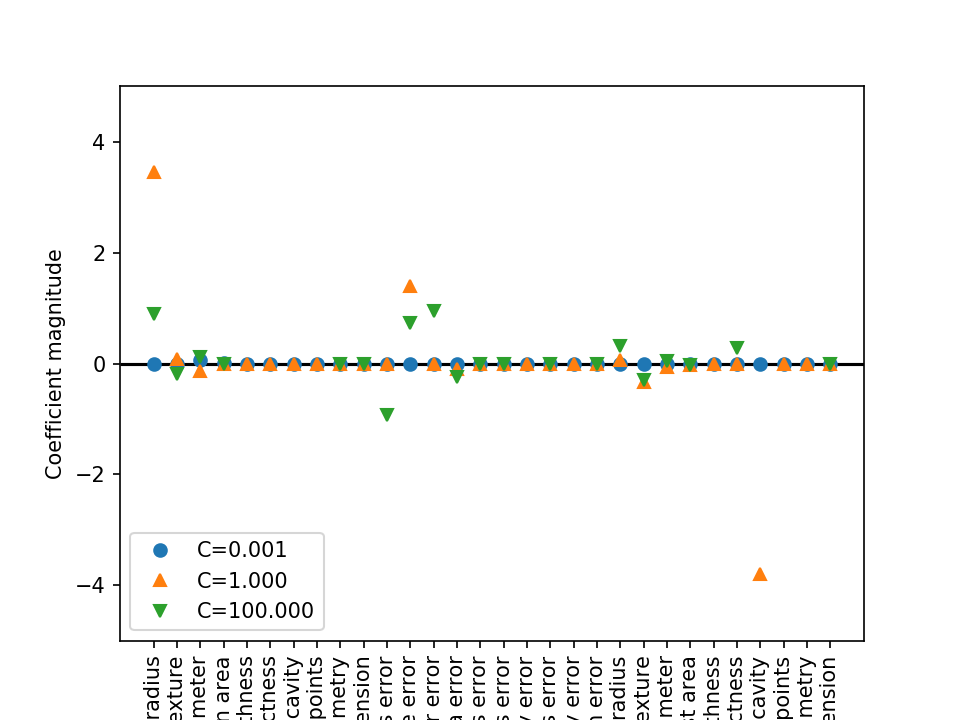

Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


In [48]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

#### 2.3.3.6 線形モデルによる多クラス分類

多クラス分類の場合は、1つのクラスとその他のクラスに分類する2クラス分類をクラスの数だけ、使うことになる。
$p$個のクラスあって、あるクラスと他のクラスを分けたい場合は、
$\omega[0]\times x[0]+\omega[1]\times x[1]+... +\omega[p]\times x[p]+b$
の中で、確信度の値が最も大きいクラスがクラスラベルとなる。

##### 　3クラスでの分類

<IPython.core.display.Javascript object>


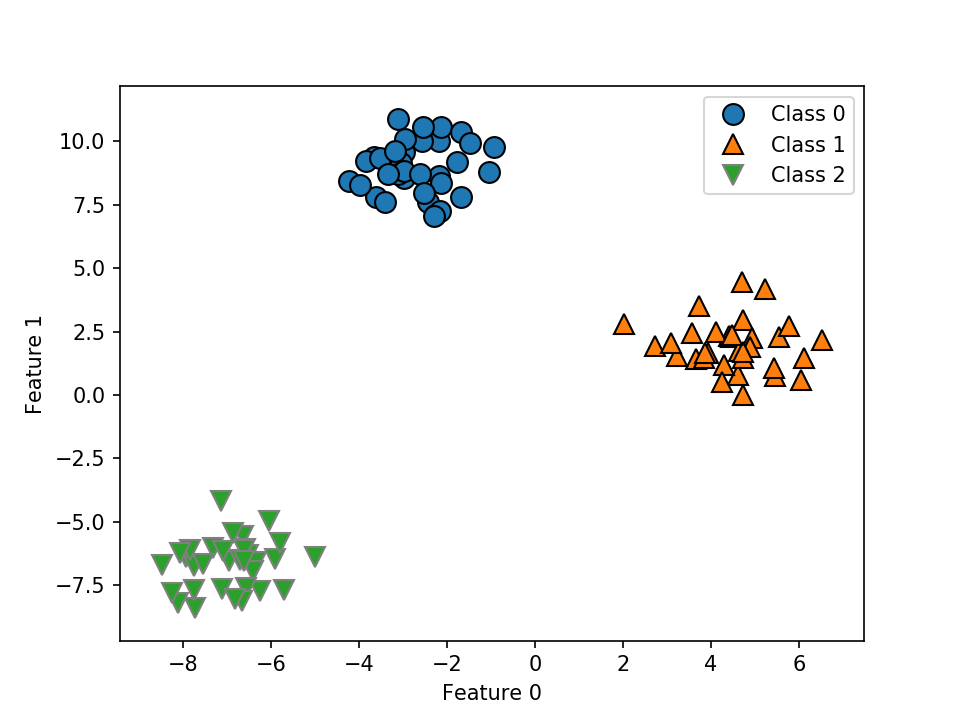

In [49]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

サポートベクタ分類  　
LinearSVC(http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)  
penalty='l1', 'l2'でL1正則化かL2正則化を選択することが出来る。defaultはL2。

In [50]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)
linear_svm.coef_
#各行が各クラスに相当する係数
#各列は各特徴量の係数

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


array([[-0.1749282 ,  0.2314036 ],
       [ 0.47621548, -0.06936555],
       [-0.18914485, -0.20399703]])

In [51]:
linear_svm.intercept_

array([-1.07745459,  0.13140592, -0.08604876])

<IPython.core.display.Javascript object>


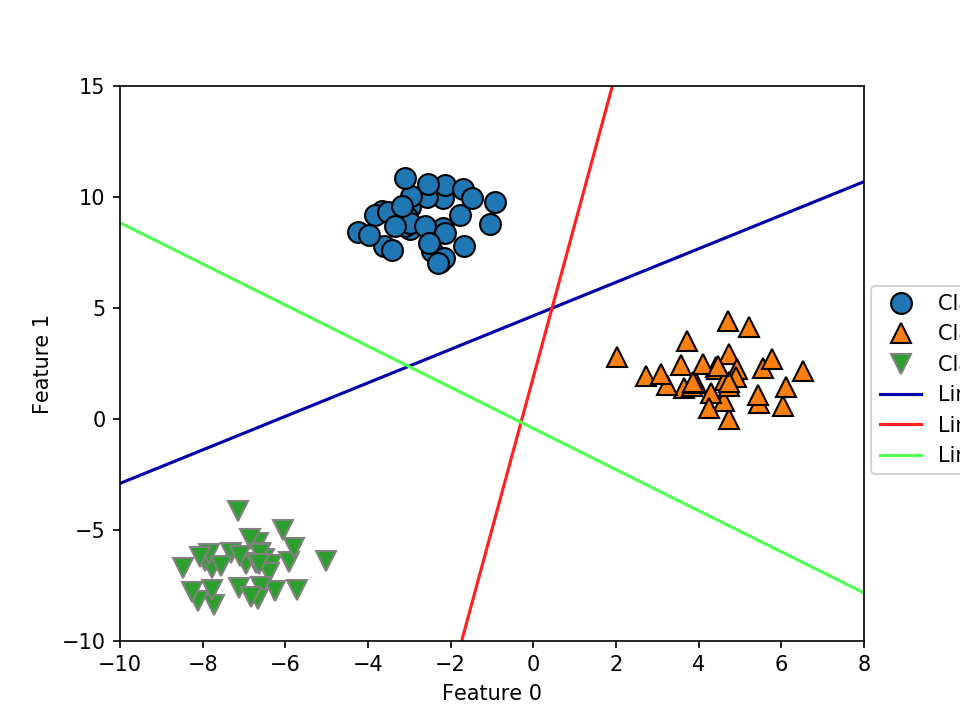

In [52]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Noted  
The underlying C implementation uses a random number generator to　select features when fitting the model. It is thus not uncommon　to have slightly different results for the same input data. If
that happens, try with a smaller ``tol`` parameter.

<IPython.core.display.Javascript object>


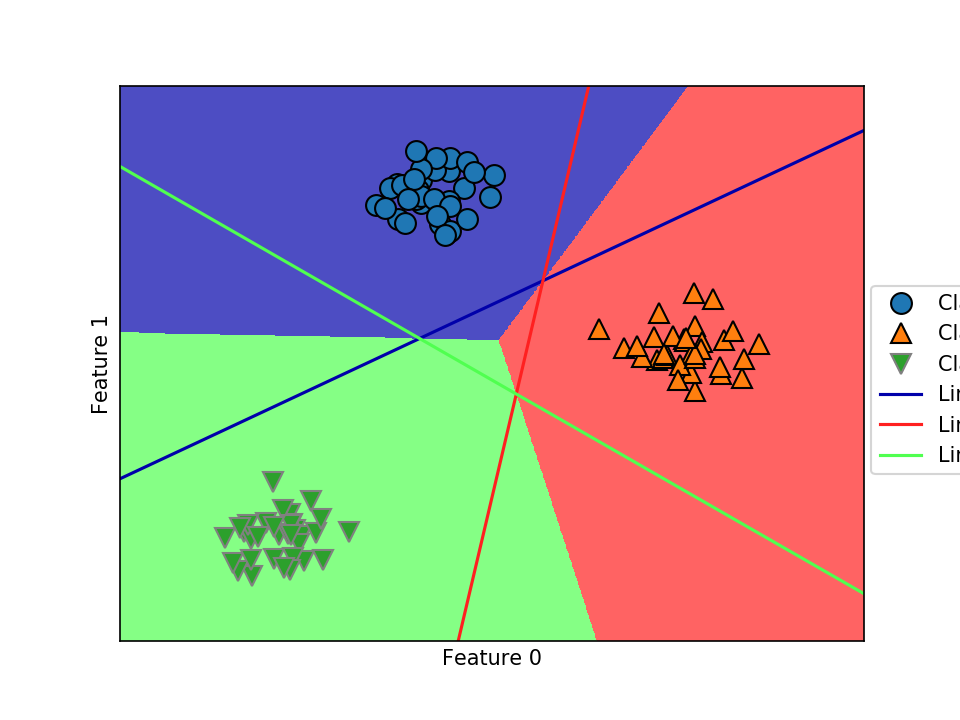

Text(0,0.5,'Feature 1')

In [53]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Please refer to the following link for plot_2d_classification
https://github.com/amueller/introduction_to_ml_with_python/blob/78cb8c0b13c9619964082eee2491fac6019fbec5/mglearn/plot_2d_separator.py

ある平面（x, y)をグリッド化して、予測値を算出し、どのクラスに入るかを確認。  
decision_values = classifier.predict(X_grid)

#### 2.3.3.7 利点、欠点、パラメータ　　
線形モデルでのパラメータ
* 回帰モデル -　alpha 
* LinearSVC, LogisticRegression - C（正則化パラメータ)
また、L1正則化, L2正則化を決める必要がある。一部の特徴量だけが重要ならL1。  
alphaが大きい場合、Cが小さい場合は単純なモデルとなる。

利点　
* 学習、予測ともに計算が高速
* 予測手法が比較的理解しやすい。  

欠点
* 低次元空間では、他のモデルの方が良い汎化性能を示すことがある。

サンプルが10万点、100万点あるようなデータに対しては、solver='sag'のオプションを使うと有効なこともある。
また、SGDClassifier, SGDRegressorクラスを使うとよい場合がある。

In [54]:
from sklearn.linear_model import LogisticRegression
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

In [55]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [56]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

### 2.3.4 ナイーブベイズクラス分類 
(http://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes)

* Bernoulli分布の例  
$P(x_i|y)=P(i|y)x_i+(1-P(i|y))(1-x_i)$

In [57]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1]) #0か１に分類

In [58]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


実際の分類例

In [59]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)
t = np.array([[1, 0, 1, 0]])
clf.predict(t)

array([1])

In [122]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)
t = np.array([[1, 1, 1, 0]])
clf.predict(t)

array([1])

In [60]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)
t = np.array([[0, 1, 0, 0]])
clf.predict(t)

array([0])

In [126]:
X = np.random.randint(2, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
print(clf.predict(X[2:3]))

[3]


array([[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]])

* MultinominalNBは、個々の特徴量の平均値を考慮  
* GaussianNBは、平均値と標準偏差も格納

#### 2.3.4.1 利点、欠点、パラメータ

* 学習も予想も非常に高速、高次元の疎なデータにも機能
* 学習の仮定も理解しやすい

パラメータ $\alpha$  
$P(x_i|y)$に$\frac{N_{yi}+\alpha}{N_y+N\alpha}$を用いる。$\alpha$はスムージングパラメータと呼ばれる。$\alpha$が大きいほどスムージングが大きくなる。確率がなめらかになることを考えると、モデルの複雑さが減少することがわかる。

#### error barについて 
https://stackoverflow.com/questions/22381497/python-scikit-learn-linear-model-parameter-standard-error
scikit-learnのデフォルトでは標準誤差が出てこない？